In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_excel(r'C:\Users\user\OneDrive\Documents\Sem 4\Business Intelligence\HeartDiseasePredictionCleaned.xlsx')

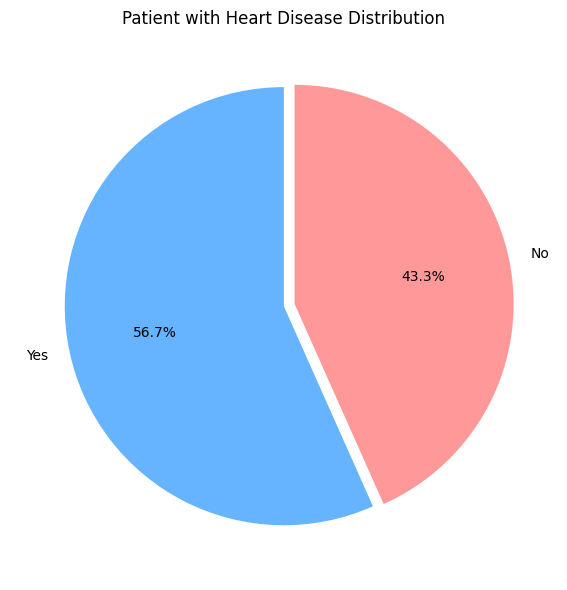

In [27]:
churn_counts = df['HeartDisease'].value_counts()
labels = ['Yes', 'No']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0,0.05))
plt.title('Patient with Heart Disease Distribution')
plt.tight_layout()
plt.show()

In [28]:
age_mapping = {
    '18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4,
    '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9,
    '70-74': 10, '75-79': 11, '80 or older': 12
}
df['AgeCategory'] = df['AgeCategory'].map(age_mapping)

In [31]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [37]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       138
           1       0.70      0.80      0.74       162

    accuracy                           0.70       300
   macro avg       0.71      0.69      0.70       300
weighted avg       0.71      0.70      0.70       300



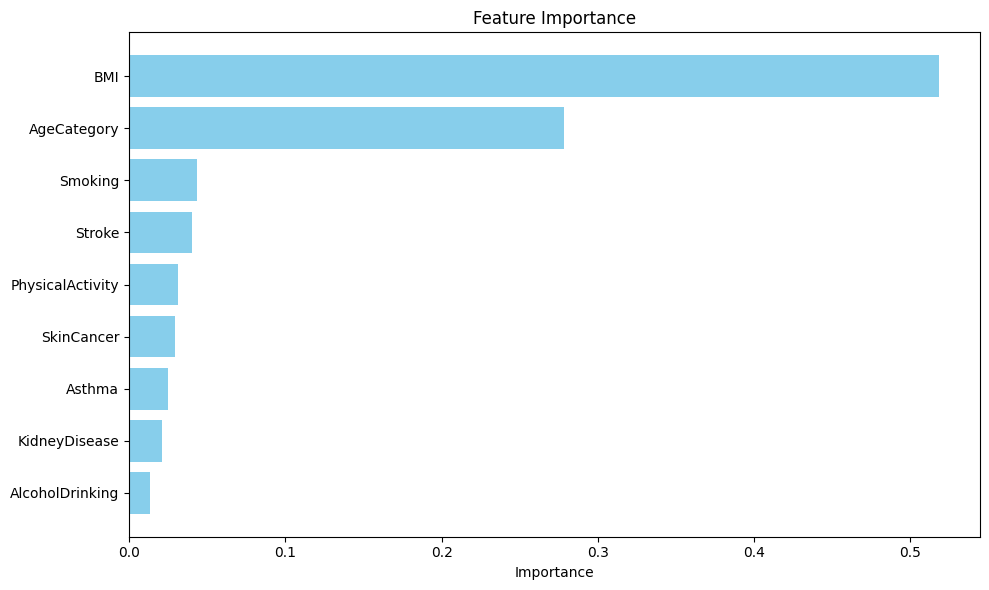

In [20]:
# Step 8: Plot Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

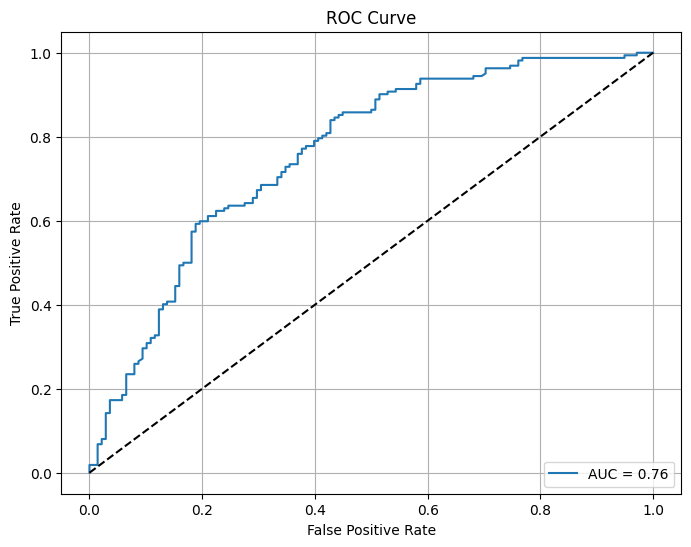

AUC-ROC Score: 0.76


In [36]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC-ROC Score: {roc_auc:.2f}")